In [2]:
import pandas as pd
import zipfile
import seaborn as sns
import numpy as np
import pickle

In [3]:
data_path="../data/data_accuracy/"

In [4]:
sales_train_validation_small = pd.read_csv(data_path+"/sales_train_validation.csv")

In [5]:
with open("national.pickle","rb") as f:
    chris_thanks =  pickle.load(f)

In [6]:
chris_thanks=chris_thanks[0:-1]

In [7]:
sales_train_validation_small

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [8]:
ts1 = sales_train_validation_small.iloc[0:1,:].copy(deep=True)

In [9]:
ts1.drop(chris_thanks,inplace=True,axis=1)

In [10]:
ts1_melt = pd.melt(ts1,id_vars="id",value_vars=[a for a in ts1.columns if "d_" in a])

In [11]:
ts1_melt

,id,variable,value
0,HOBBIES_1_001_CA_1_validation,d_1,0
1,HOBBIES_1_001_CA_1_validation,d_2,0
2,HOBBIES_1_001_CA_1_validation,d_3,0
3,HOBBIES_1_001_CA_1_validation,d_4,0
4,HOBBIES_1_001_CA_1_validation,d_5,0
...,...,...,...
1857,HOBBIES_1_001_CA_1_validation,d_1909,1
1858,HOBBIES_1_001_CA_1_validation,d_1910,3
1859,HOBBIES_1_001_CA_1_validation,d_1911,0
1860,HOBBIES_1_001_CA_1_validation,d_1912,1


<AxesSubplot:xlabel='variable', ylabel='value'>

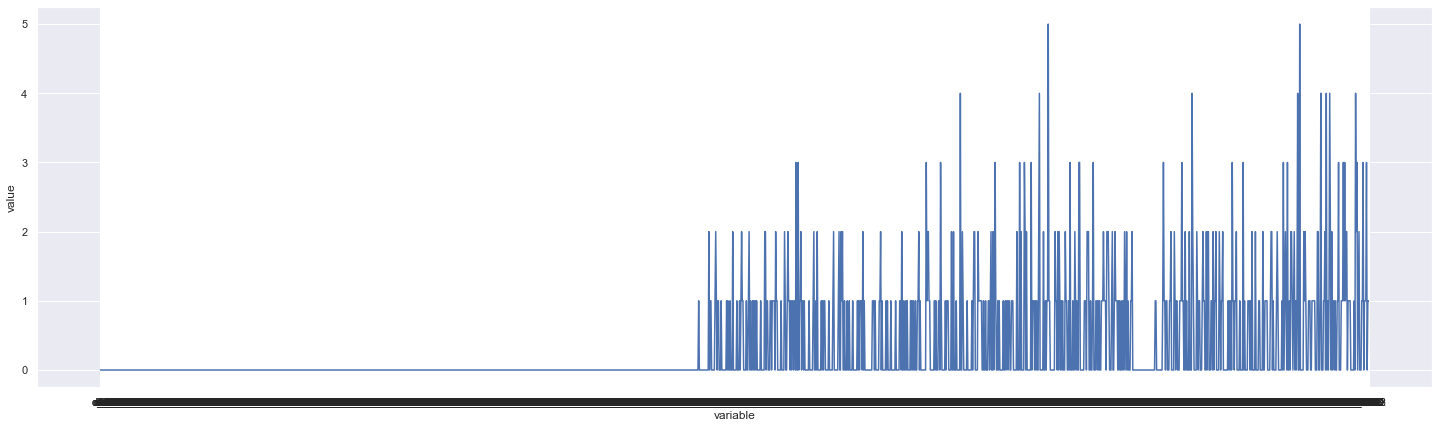

In [12]:
sns.set(rc={'figure.figsize':(25,7)})
sns.lineplot(x="variable",y="value",data=ts1_melt)

In [13]:
day_columns = [a for a in ts1.columns if "d_" in a]

In [14]:
ts1[day_columns].cumsum(axis=1)

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,567,570,570,571,572,573,576,576,577,578


In [15]:
sum(ts1[day_columns].cumsum(axis=1).iloc[0]==0)

878

In [16]:
day_columns.reverse()

In [17]:
ts1[day_columns].cumsum(axis=1)

,d_1913,d_1912,d_1911,d_1910,d_1909,d_1908,d_1907,d_1906,d_1905,d_1904,...,d_10,d_9,d_8,d_7,d_6,d_5,d_4,d_3,d_2,d_1
0,1,2,2,5,6,7,8,8,11,12,...,578,578,578,578,578,578,578,578,578,578


In [18]:
def timeseries_length(x):
    day_columns = [a for a in x.columns if "d_" in a]
    days_to_start = sum(x[day_columns].cumsum(axis=1).iloc[0]==0)
    day_columns.reverse()
    days_since_stopped = sum(x[day_columns].cumsum(axis=1).iloc[0]==0)
    time_series_length = len(day_columns)-days_to_start-days_since_stopped
    return pd.Series([days_to_start,days_since_stopped,time_series_length])
data = sales_train_validation_small.groupby("id").apply(timeseries_length)  

In [19]:
data.reset_index(inplace=True)

In [20]:
data.columns=['id','days_to_start','days_since_stopped','time_series_length']

<AxesSubplot:>

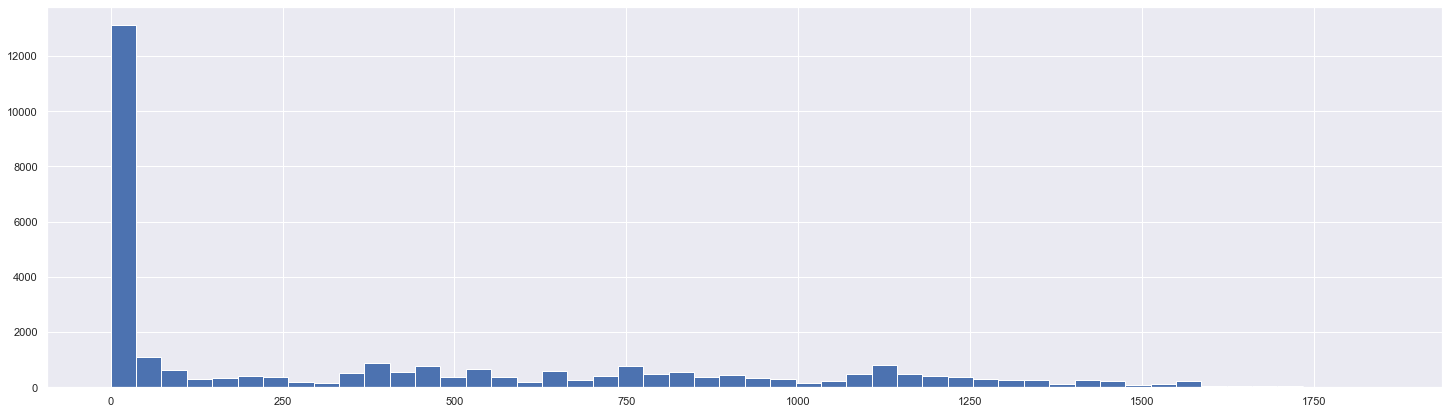

In [21]:
data["days_to_start"].hist(bins=50)

<AxesSubplot:>

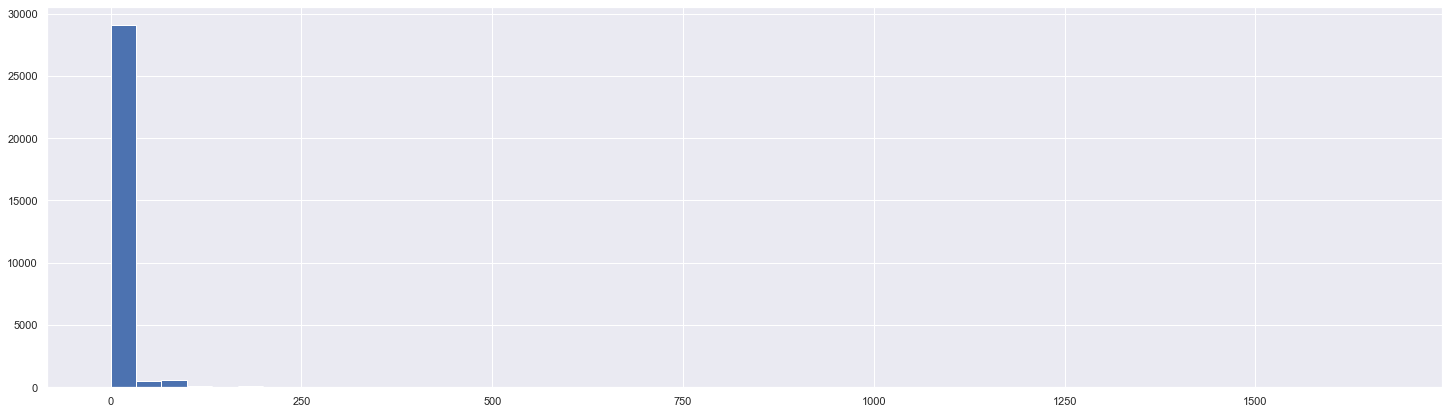

In [22]:
data["days_since_stopped"].hist(bins=50)

In [23]:
data[data["days_since_stopped"]>10].sort_values('days_since_stopped')

,id,days_to_start,days_since_stopped,time_series_length
24859,HOUSEHOLD_1_493_WI_3_validation,8,11,1894
18824,HOBBIES_2_030_TX_1_validation,485,11,1417
29242,HOUSEHOLD_2_392_CA_3_validation,216,11,1686
4403,FOODS_2_226_CA_4_validation,596,11,1306
4395,FOODS_2_225_TX_2_validation,2,11,1900
...,...,...,...,...
17634,HOBBIES_1_335_TX_1_validation,516,934,463
17639,HOBBIES_1_335_WI_3_validation,517,940,456
3436,FOODS_2_129_TX_3_validation,453,958,502
17637,HOBBIES_1_335_WI_1_validation,517,1029,367


<AxesSubplot:>

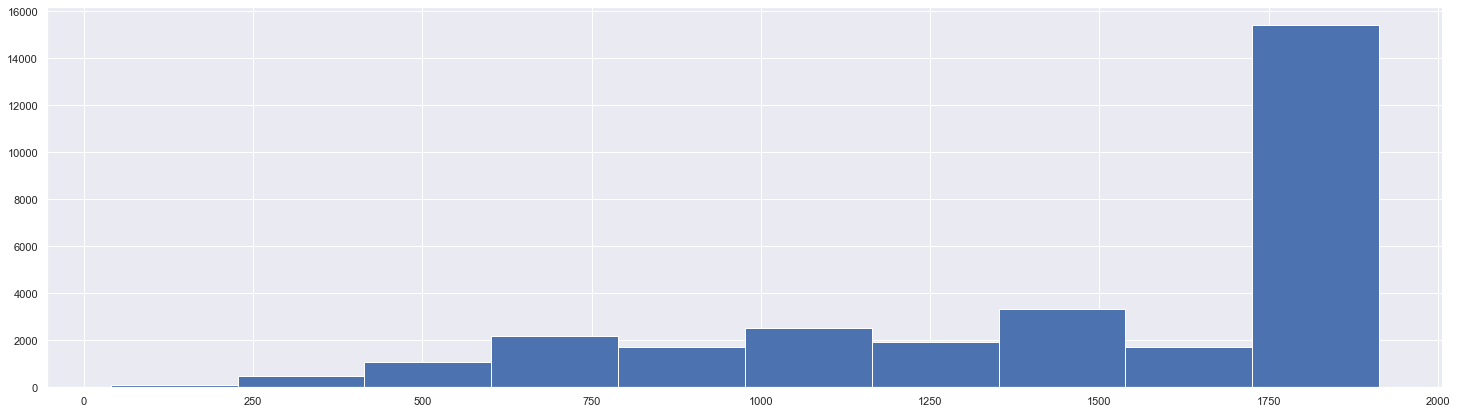

In [24]:
data["time_series_length"].hist()

In [25]:
data["time_series_length"].min()

40

In [26]:
data[data["time_series_length"]<0.3*1941]

,id,days_to_start,days_since_stopped,time_series_length
273,FOODS_1_029_CA_4_validation,1511,8,394
1190,FOODS_1_122_CA_1_validation,1401,1,511
1191,FOODS_1_122_CA_2_validation,1403,1,509
1192,FOODS_1_122_CA_3_validation,1403,1,509
1193,FOODS_1_122_CA_4_validation,1402,2,509
...,...,...,...,...
29959,HOUSEHOLD_2_463_WI_3_validation,1312,33,568
30014,HOUSEHOLD_2_469_TX_1_validation,1347,7,559
30018,HOUSEHOLD_2_469_WI_2_validation,1349,15,549
30303,HOUSEHOLD_2_498_CA_4_validation,1432,5,476


In [27]:
check_ts = data[data["days_since_stopped"]>60].sort_values('days_since_stopped')["id"].tolist()

In [28]:
vald = pd.read_csv(data_path+"/sales_train_evaluation.csv")

In [29]:
data.sort_values("time_series_length")

,id,days_to_start,days_since_stopped,time_series_length
13871,FOODS_3_778_CA_2_validation,1648,225,40
2728,FOODS_2_057_WI_2_validation,1663,202,48
20218,HOUSEHOLD_1_020_WI_2_validation,1845,1,67
12070,FOODS_3_595_CA_1_validation,1845,0,68
23971,HOUSEHOLD_1_405_CA_2_validation,1844,0,69
...,...,...,...,...
9905,FOODS_3_378_TX_2_validation,0,0,1913
27165,HOUSEHOLD_2_184_TX_2_validation,0,0,1913
9902,FOODS_3_378_CA_3_validation,0,0,1913
9971,FOODS_3_385_CA_2_validation,0,0,1913
